In [21]:
import pandas as pd
dataset=pd.read_csv("data.csv")
dataset.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
dataset.isnull().sum().sum()

0

<AxesSubplot:title={'center':'histrogam of prices '}, xlabel='price', ylabel='Frequency'>

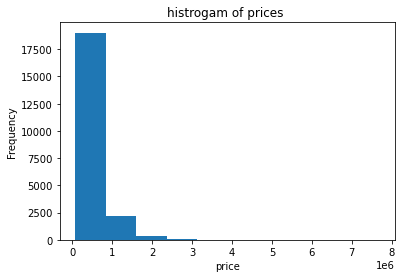

In [23]:
import matplotlib.pyplot as plt
plt.title("histrogam of prices ")
plt.xlabel("price")
dataset["price"].plot.hist()


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

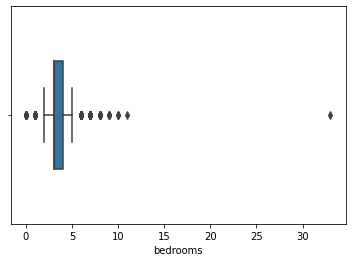

In [24]:
import seaborn as sns
sns.boxplot(dataset["bedrooms"],width=0.5)


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

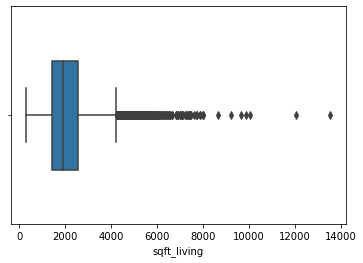

In [25]:
sns.boxplot(dataset["sqft_living"],width=0.5)


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr_built'>

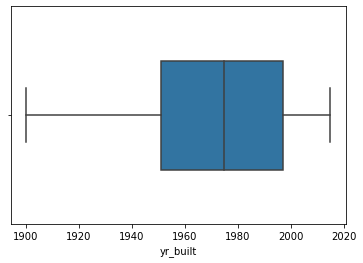

In [26]:
sns.boxplot(dataset["yr_built"],width=0.5)


In [27]:
DT=dataset
selection = DT[["bedrooms","sqft_living","yr_built","price"]]
print(selection)


       bedrooms  sqft_living  yr_built     price
0             3         1180      1955  221900.0
1             3         2570      1951  538000.0
2             2          770      1933  180000.0
3             4         1960      1965  604000.0
4             3         1680      1987  510000.0
...         ...          ...       ...       ...
21608         3         1530      2009  360000.0
21609         4         2310      2014  400000.0
21610         2         1020      2009  402101.0
21611         3         1600      2004  400000.0
21612         2         1020      2008  325000.0

[21613 rows x 4 columns]


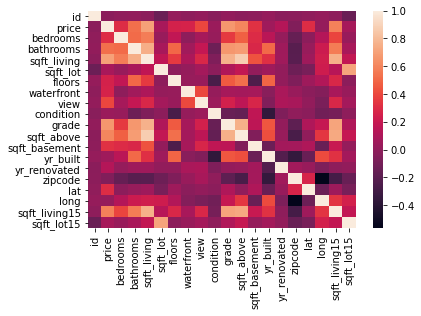

In [28]:
DT.corr()
corr=DT.corr()
sns.heatmap(DT.corr( ));
#we're trying to predict houses prices based on the most important features

In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [55]:
x=DT["bedrooms"].values[:,np.newaxis]
y=DT["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 



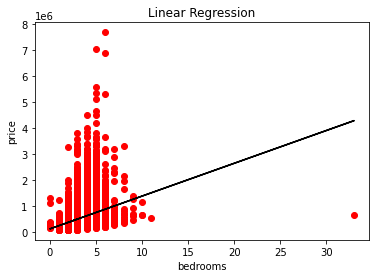

In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()   
model.fit(x_train,y_train)  
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("bedrooms")
plt.plot(x,model.predict(x),color="k")
plt.show()



In [60]:
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))




MSE 113639694726.18774
R squared 0.09607121498911486


In [69]:

x=DT[["bedrooms","yr_built"]] 
y=DT["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 113639694726.18774
R squared 0.09607121498911486


In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [71]:
x= DT[["bedrooms", "yr_built"]]
y= DT["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  1772971889451.0234
R squared:  -13.10282146349867


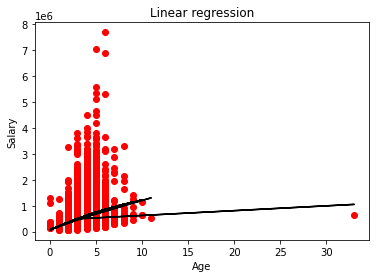

In [72]:
x= DT["bedrooms"].values.reshape(-1,1)
y= DT["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 